In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [21]:
df = pd.read_csv("insurance.csv")

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


EDA

In [24]:
 df.shape

(1338, 7)

Categoris Feature -> sex,Smoker, Region

In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [26]:
df.describe()


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [27]:
import seaborn as sns

C:\Users\91934\AppData\Local\Temp\ipykernel_24148\2503073125.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


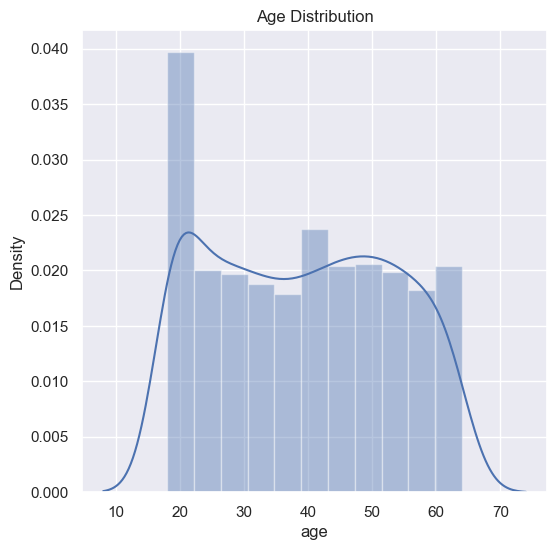

In [29]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()


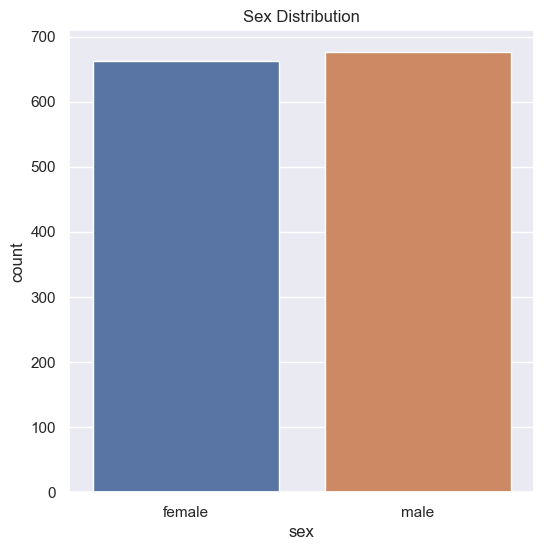

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

In [33]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\91934\AppData\Local\Temp\ipykernel_24148\1376812171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


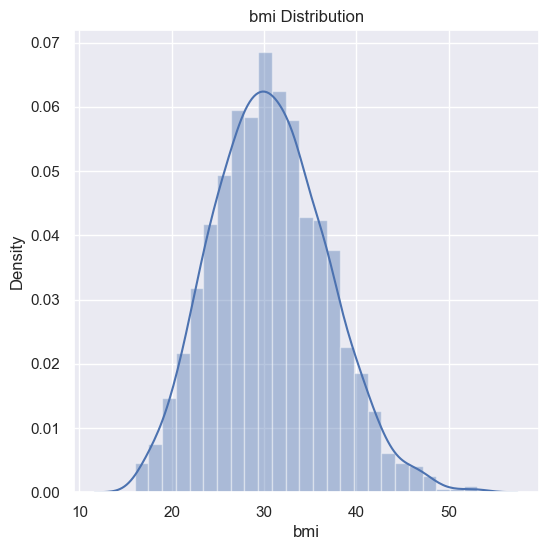

In [34]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

Normal Bmi = 18.5 to 24.9

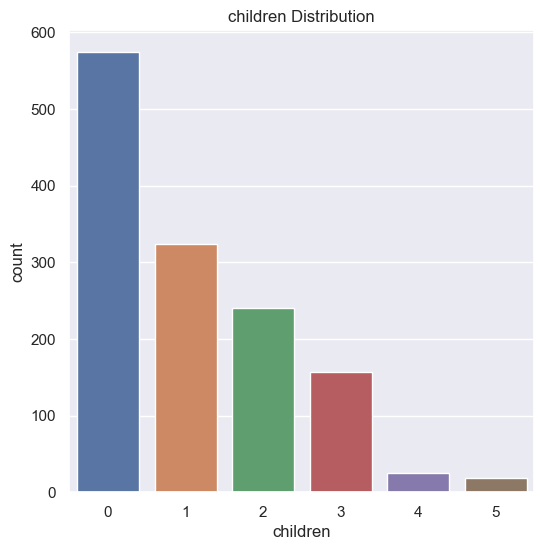

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children Distribution')
plt.show()

In [36]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

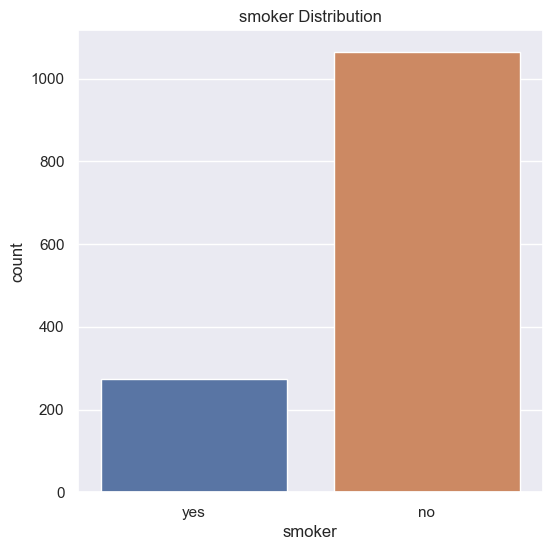

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker Distribution')
plt.show()

In [38]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

C:\Users\91934\AppData\Local\Temp\ipykernel_24148\2876543176.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'])


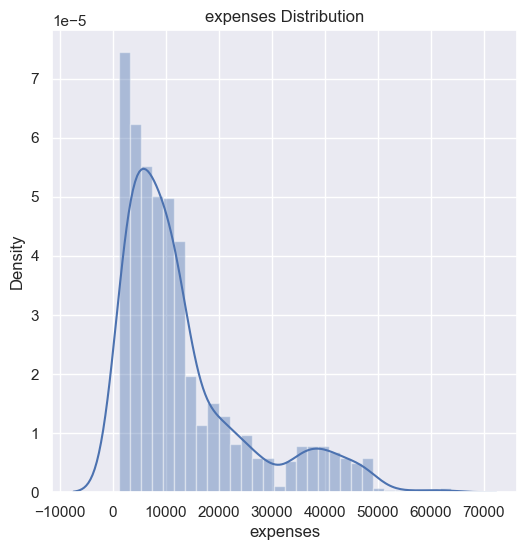

In [41]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['expenses'])
plt.title('expenses Distribution')
plt.show()

Encodeing The categorical Feature

In [43]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [44]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [47]:
df.replace({'region':{'southeast':0,'northeast':1,'southwest':3,'northwest':4}},inplace=True)

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,3,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,4,21984.47
4,32,0,28.9,0,1,4,3866.86


split Train And Test Data

In [50]:
X = df.drop(columns = 'expenses',axis=1)

In [51]:
Y = df['expenses']

In [52]:
print(X)

      age  sex   bmi  children  smoker  region
0      19    1  27.9         0       0       3
1      18    0  33.8         1       1       0
2      28    0  33.0         3       1       0
3      33    0  22.7         0       1       4
4      32    0  28.9         0       1       4
...   ...  ...   ...       ...     ...     ...
1333   50    0  31.0         3       1       4
1334   18    1  31.9         0       1       1
1335   18    1  36.9         0       1       0
1336   21    1  25.8         0       1       3
1337   61    1  29.1         0       0       4

[1338 rows x 6 columns]


In [53]:
print(Y)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


Training and testing

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [59]:
print(X.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training:

In [61]:
regressor = LinearRegression()

In [62]:
regressor.fit(x_train,y_train)

LinearRegression()

model Evalution

In [63]:
# Prediction on traingdata
traing_data_prediction = regressor.predict(x_train)

In [67]:
r2_train = metrics.r2_score(y_train,traing_data_prediction)

In [69]:
print(r2_train)

0.751163581270363


In [72]:
testing_data_prediction = regressor.predict(x_test)

In [74]:
r2_test = metrics.r2_score(y_test,testing_data_prediction)

In [76]:
print(r2_test)

0.7427406802316184


Building Predicting System

In [77]:
input_data = (31,1,25.74,0,1,0)

In [78]:
# Changing input data to np.array
ip_data_np_array = np.asarray(input_data)

In [81]:
input_data_reshaped = ip_data_np_array.reshape(1,-1)

In [82]:
prediction = regressor.predict(input_data_reshaped)

C:\Users\91934\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [84]:
print('The insurance cost is ',prediction[0])

The insurance cost is  4145.550044987067
